In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
data = pd.read_excel(r'lgd_data.xlsx')

data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
0,238203,729,36,3.81,47603,88,24,4,2,Rent,Home Improvement,Adjustable Rate,South,0.010000
1,170008,745,36,6.68,67474,71,43,4,2,Mortgage,Auto Loan,Adjustable Rate,South,0.757182
2,198937,681,24,8.38,77036,74,46,6,1,Own,Personal Loan,Fixed Rate,West,0.575147
3,262045,684,48,5.45,55083,85,24,0,0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998
4,243378,758,72,6.64,70148,78,40,5,0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140,723,24,5.62,71515,91,17,3,0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995
39996,250556,777,72,6.16,45326,88,34,3,0,Rent,Auto Loan,Fixed Rate,West,0.834943
39997,234493,827,60,5.97,48418,78,24,7,1,Rent,Debt Consolidation,Fixed Rate,West,0.897571
39998,159998,698,36,8.65,85987,73,37,6,0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537


In [3]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Exposure Amount ($),40000.0,NaN,NaN,NaN,149811.0704,49836.964295,-82998.0,116398.0,149822.5,183328.0,341590.0
Credit Score,40000.0,NaN,NaN,NaN,700.6673,49.974161,505.0,667.0,701.0,734.0,914.0
Loan Term (Months),40000.0,NaN,NaN,NaN,47.9106,17.00847,24.0,36.0,48.0,60.0,72.0
Interest Rate (%),40000.0,NaN,NaN,NaN,6.49956,1.504729,0.38,5.48,6.49,7.52,12.51
Income ($),40000.0,NaN,NaN,NaN,60069.30675,19926.497499,-17513.0,46567.5,60058.0,73416.75,152467.0
Loan to Value Ratio (%),40000.0,NaN,NaN,NaN,79.982225,9.986641,37.0,73.0,80.0,87.0,121.0
Debt to Income Ratio (%),40000.0,NaN,NaN,NaN,30.08045,9.98215,-13.0,23.0,30.0,37.0,71.0
Employment History (Years),40000.0,NaN,NaN,NaN,5.002275,2.015557,-5.0,4.0,5.0,6.0,13.0
Previous Defaults,40000.0,NaN,NaN,NaN,0.998925,0.81853,0.0,0.0,1.0,2.0,2.0
Home Ownership,40000,3,Rent,13420,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# There is no missing but still checking for good measure

data.isnull().sum()

Exposure Amount ($)           0
Credit Score                  0
Loan Term (Months)            0
Interest Rate (%)             0
Income ($)                    0
Loan to Value Ratio (%)       0
Debt to Income Ratio (%)      0
Employment History (Years)    0
Previous Defaults             0
Home Ownership                0
Loan Purpose                  0
Loan Type                     0
Region                        0
LGD%                          0
dtype: int64

In [5]:
data.dtypes

Exposure Amount ($)             int64
Credit Score                    int64
Loan Term (Months)              int64
Interest Rate (%)             float64
Income ($)                      int64
Loan to Value Ratio (%)         int64
Debt to Income Ratio (%)        int64
Employment History (Years)      int64
Previous Defaults               int64
Home Ownership                    str
Loan Purpose                      str
Loan Type                         str
Region                            str
LGD%                          float64
dtype: object

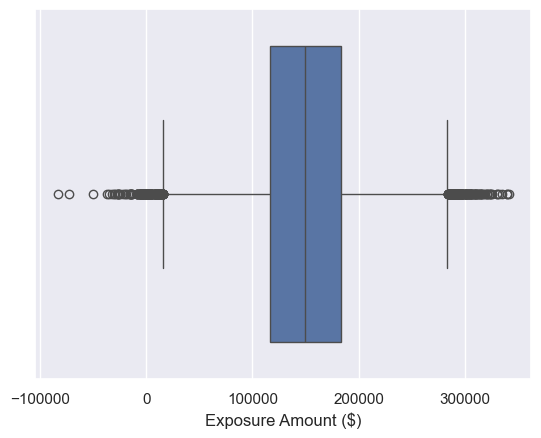

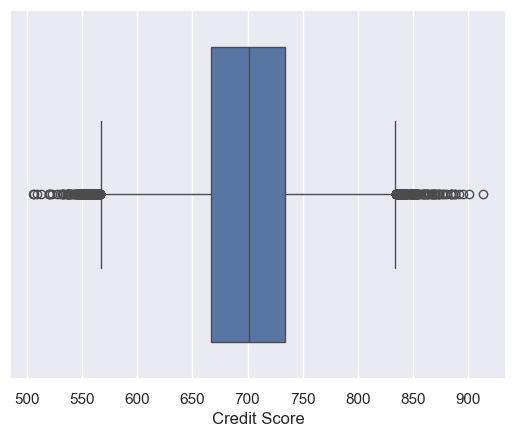

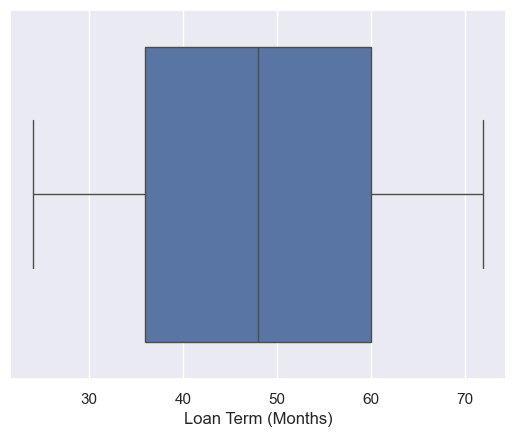

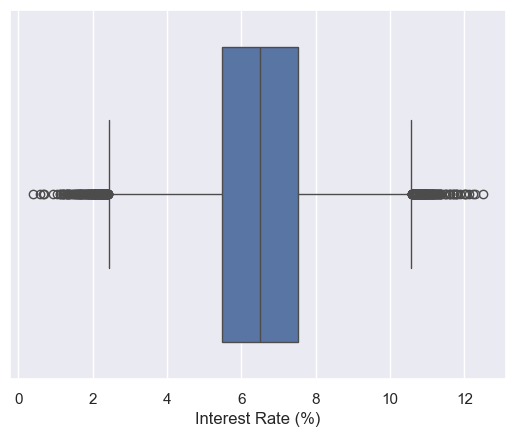

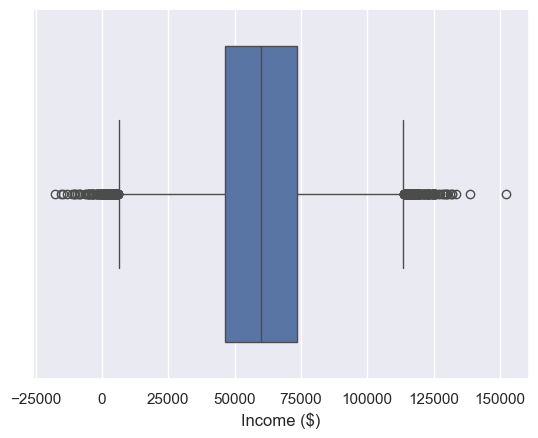

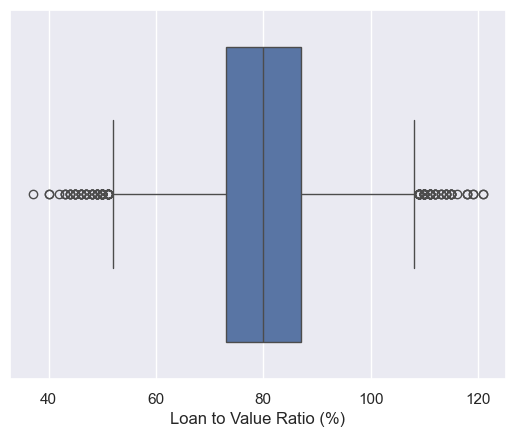

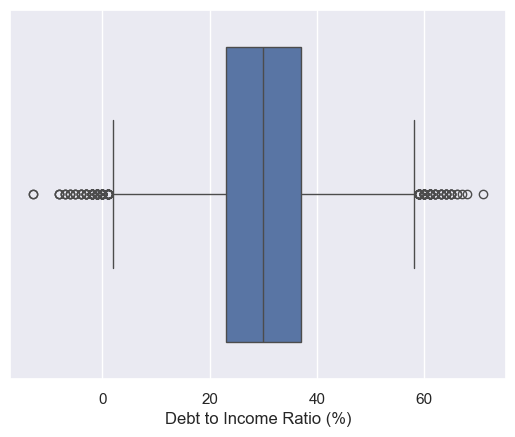

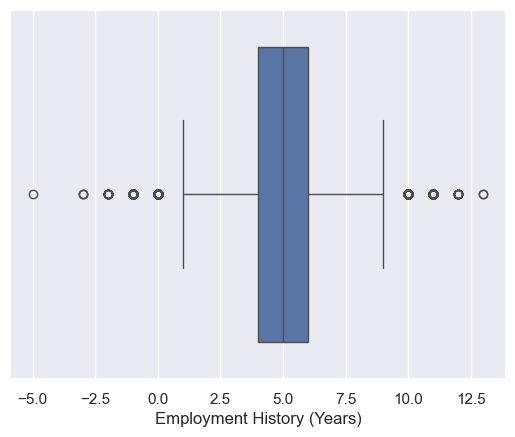

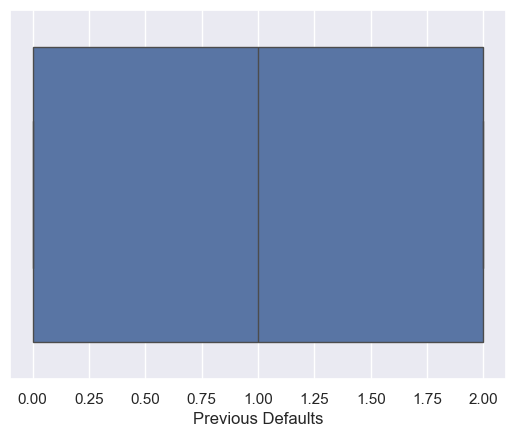

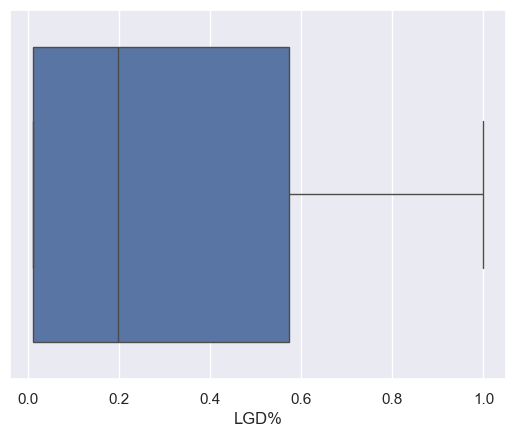

In [6]:
# Checking outliers

for i in data.columns:
    if data[i].dtypes == int or data[i].dtypes == float:
        sns.boxplot(x=data[i], data = data)
        plt.show()

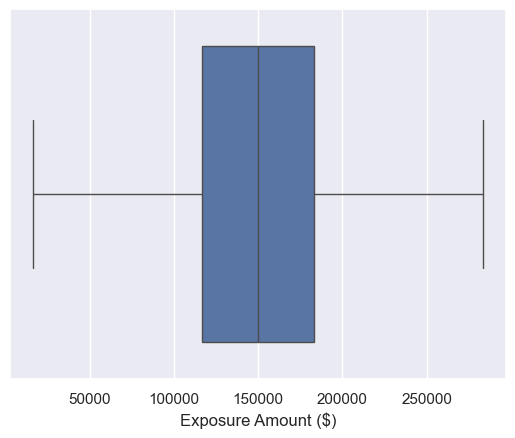

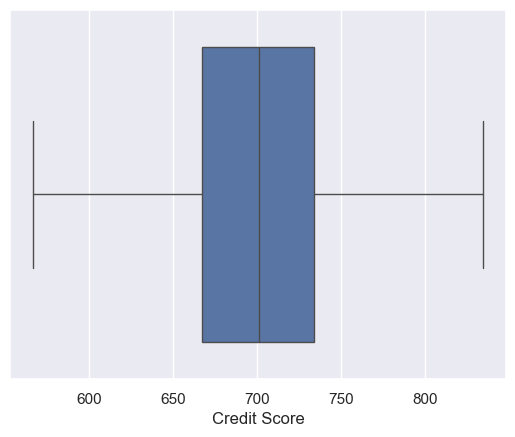

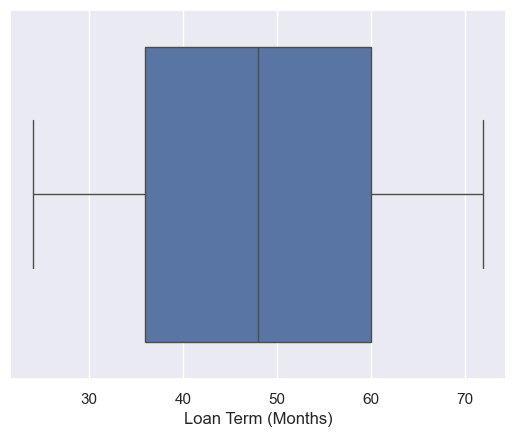

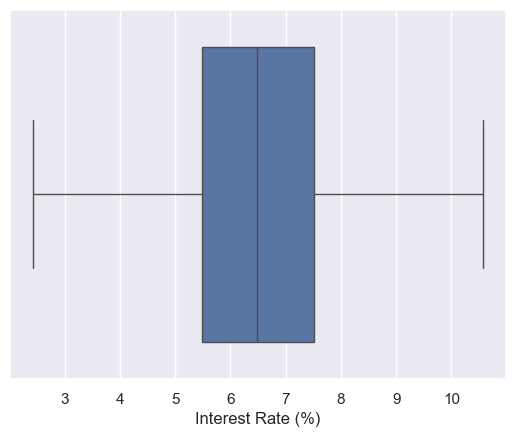

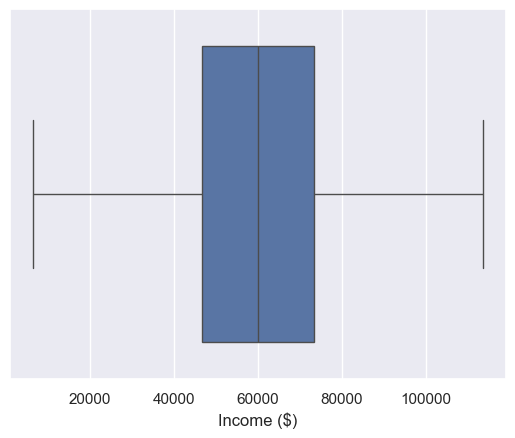

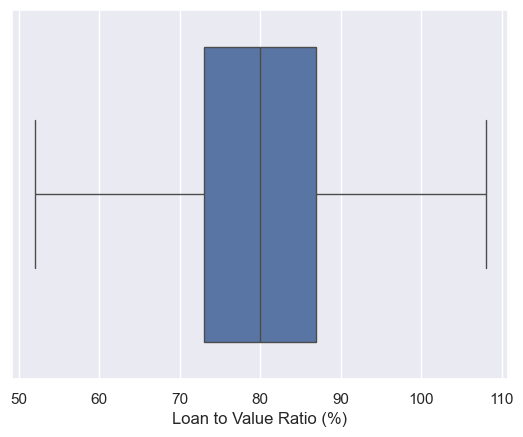

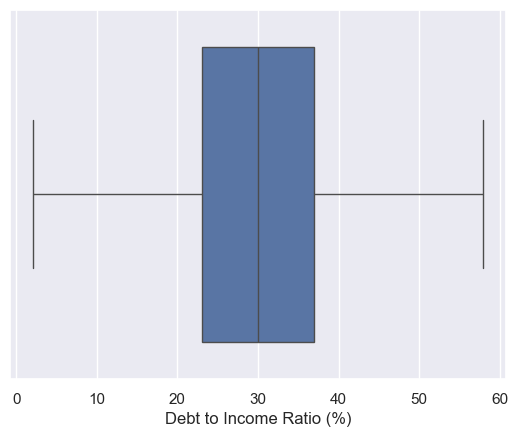

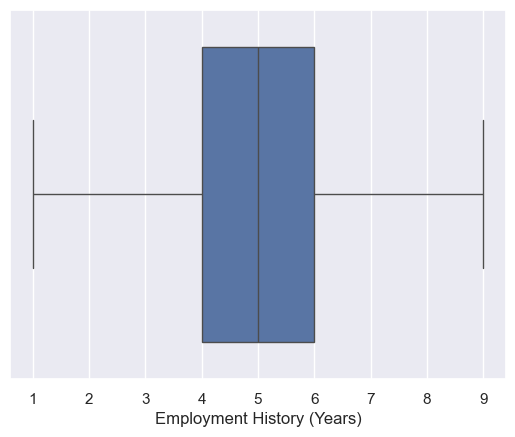

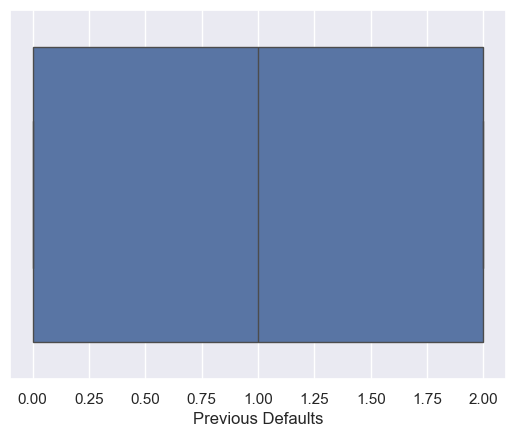

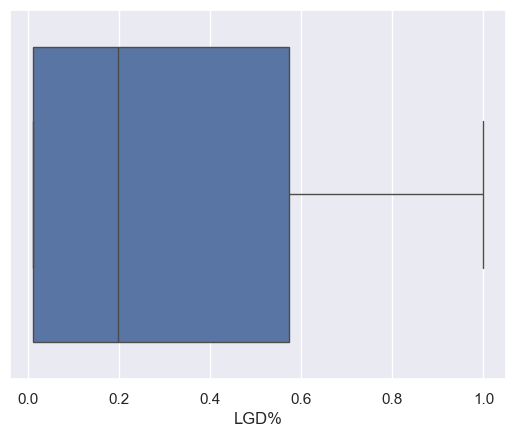

In [7]:
q1 = data.quantile(0.25, numeric_only= True)
q3 = data.quantile(0.75, numeric_only= True)

iqr = q3-q1
upper = q3+ 1.5*iqr
lower = q1 - 1.5*iqr

for i in data.columns:
    if data[i].dtypes == int or data[i].dtypes == float:
        data[i]= np.where(data[i]<lower[i], lower[i], data[i])
        data[i]= np.where(data[i]>upper[i], upper[i], data[i])
        sns.boxplot(x=data[i], data = data)
        plt.show()

In [11]:
data['Income_mean_by_Region'] = data.groupby('Region')['Income ($)'].transform('mean')
data['Previous_Defaults_mean_by_Credit_Score'] = data.groupby('Credit Score')['Income ($)'].transform('mean')

data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score
0,238203.0,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000,60082.674340,61232.968238
1,170008.0,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182,60082.674340,60860.187500
2,198937.0,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147,60307.337702,60207.183923
3,262045.0,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998,60307.337702,59697.184629
4,243378.0,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000,59985.178837,59167.544331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,723.0,24.0,5.62,71515.0,91.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995,59985.178837,60295.231293
39996,250556.0,777.0,72.0,6.16,45326.0,88.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943,60307.337702,60509.296875
39997,234493.0,827.0,60.0,5.97,48418.0,78.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571,60307.337702,48059.437500
39998,159998.0,698.0,36.0,8.65,85987.0,73.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537,60307.337702,61164.214765


In [12]:
for i in data.columns:
    if data[i].dtype in [int, float]:
        kstest_stat, kstest_p_val = stats.kstest(data[i], 'norm')

        print('Column', i)
        print('P value', kstest_p_val)
    
        if kstest_p_val > 0.05:
            print('Data is normally distributed')
            print()
        else:
            print('Data is not normally distributed')
            print()

Column Exposure Amount ($)
P value 0.0
Data is not normally distributed

Column Credit Score
P value 0.0
Data is not normally distributed

Column Loan Term (Months)
P value 0.0
Data is not normally distributed

Column Interest Rate (%)
P value 0.0
Data is not normally distributed

Column Income ($)
P value 0.0
Data is not normally distributed

Column Loan to Value Ratio (%)
P value 0.0
Data is not normally distributed

Column Debt to Income Ratio (%)
P value 0.0
Data is not normally distributed

Column Employment History (Years)
P value 0.0
Data is not normally distributed

Column Previous Defaults
P value 0.0
Data is not normally distributed

Column LGD%
P value 0.0
Data is not normally distributed

Column Income_mean_by_Region
P value 0.0
Data is not normally distributed

Column Previous_Defaults_mean_by_Credit_Score
P value 0.0
Data is not normally distributed



In [15]:
data.corr(method= 'spearman', numeric_only= True)

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score
Exposure Amount ($),1.000000,0.000537,-0.004889,0.007016,-0.001408,0.001700,0.001135,0.001011,0.003210,0.108719,0.000093,0.003325
Credit Score,0.000537,1.000000,0.005094,0.002438,0.003012,0.003004,-0.005423,0.002966,0.003455,0.489755,0.001896,0.069242
Loan Term (Months),-0.004889,0.005094,1.000000,-0.005708,-0.000408,0.000966,-0.002118,0.000815,-0.002210,0.337089,-0.005692,0.008398
Interest Rate (%),0.007016,0.002438,-0.005708,1.000000,0.001770,0.000017,-0.000638,0.004275,0.003819,0.165559,-0.000407,0.005277
Income ($),-0.001408,0.003012,-0.000408,0.001770,1.000000,-0.008877,0.010637,-0.004133,-0.000187,0.405091,0.007087,0.076492
Loan to Value Ratio (%),0.001700,0.003004,0.000966,0.000017,-0.008877,1.000000,-0.000482,-0.003582,-0.000311,0.240004,0.003880,-0.006395
Debt to Income Ratio (%),0.001135,-0.005423,-0.002118,-0.000638,0.010637,-0.000482,1.000000,-0.001078,-0.003350,0.319163,0.002722,0.001992
Employment History (Years),0.001011,0.002966,0.000815,0.004275,-0.004133,-0.003582,-0.001078,1.000000,0.004300,0.160256,0.002791,0.002169
Previous Defaults,0.003210,0.003455,-0.002210,0.003819,-0.000187,-0.000311,-0.003350,0.004300,1.000000,0.253319,-0.000845,-0.001456
LGD%,0.108719,0.489755,0.337089,0.165559,0.405091,0.240004,0.319163,0.160256,0.253319,1.000000,0.005827,0.060780


In [16]:
def target_corr(target, data, threshold = 0.1):
    corr = data.corr(method= 'spearman', numeric_only= True)[target].drop(target)
    corr = corr[corr.abs() >= threshold]


    corr = corr.reindex(corr.abs().sort_values(ascending=False).index)

    return corr.reset_index().rename(

        columns = {'index': 'Varable', target: 'Correlation with the target'}
        )


In [17]:
target_corr('LGD%', data)

,Varable,Correlation with the target
0,Credit Score,0.489755
1,Income ($),0.405091
2,Loan Term (Months),0.337089
3,Debt to Income Ratio (%),0.319163
4,Previous Defaults,0.253319
5,Loan to Value Ratio (%),0.240004
6,Interest Rate (%),0.165559
7,Employment History (Years),0.160256
8,Exposure Amount ($),0.108719


In [18]:
def inter_corr(data, target, threshold = 0.6):

    corr_matrix = data.drop(columns=[target]).corr(numeric_only=True, method='spearman')
    
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    
    high_corr = corr_matrix.where(mask).stack().reset_index()
    
    high_corr.columns = ["Variable 1", "Variable 2", "Correlation"]
    
    high_corr = high_corr[high_corr["Correlation"].abs() >= threshold]
    
    return high_corr.reset_index(drop=True)

In [19]:
intercorrelated_results = inter_corr(data, 'LGD%')

intercorrelated_results

,Variable 1,Variable 2,Correlation


In [20]:
def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, [
                                           #     'Credit Score',
                                             'Income ($)',
                                            'Loan Term (Months)',
                                                    'Debt to Income Ratio (%)',
                                             'Previous Defaults',
                                       #     'Loan to Value Ratio (%)',
                                           #         'Interest Rate (%)',
                                             'Employment History (Years)',
                                            'Exposure Amount ($)',
                                            
                                        ])

vif_result

,VIF,Features
0,8.120835,Income ($)
1,7.324425,Loan Term (Months)
2,8.116730,Debt to Income Ratio (%)
3,2.405987,Previous Defaults
4,6.504986,Employment History (Years)
5,8.070681,Exposure Amount ($)


In [21]:
data.drop(columns= ['Credit Score', 'Loan to Value Ratio (%)', 'Interest Rate (%)'], inplace= True)

In [22]:
data.columns

Index(['Exposure Amount ($)', 'Loan Term (Months)', 'Income ($)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region', 'LGD%', 'Income_mean_by_Region',
       'Previous_Defaults_mean_by_Credit_Score'],
      dtype='str')

In [23]:
data1 = data[['LGD%','Income ($)', 'Loan Term (Months)', 'Debt to Income Ratio (%)',
              'Previous Defaults', 'Employment History (Years)', 'Exposure Amount ($)',
             'Home Ownership', 'Loan Purpose', 'Loan Type', 'Region']]

## 11. Kateqorik deyishenlerin numeric-e chevrilmesi (CONVERSIONS)

pd.get_dummies ile butun kateqorik sutunlar numeric-e chevrilir. drop_first istifade olunmalidir.

In [24]:
data1 = pd.get_dummies(data1, drop_first=True, dtype=int)

data1

,LGD%,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($),Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,0.010000,47603.0,36.0,24.0,2.0,4.0,238203.0,0,1,0,1,0,0,0,0,1,0
1,0.757182,67474.0,36.0,43.0,2.0,4.0,170008.0,0,0,0,0,0,0,0,0,1,0
2,0.575147,77036.0,24.0,46.0,1.0,6.0,198937.0,1,0,0,0,0,1,1,0,0,1
3,0.009998,55083.0,48.0,24.0,0.0,1.0,262045.0,0,0,0,0,1,0,0,0,0,1
4,1.000000,70148.0,72.0,40.0,0.0,5.0,243378.0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.009995,71515.0,24.0,17.0,0.0,3.0,77140.0,0,0,1,0,0,0,0,1,0,0
39996,0.834943,45326.0,72.0,34.0,0.0,3.0,250556.0,0,1,0,0,0,0,1,0,0,1
39997,0.897571,48418.0,60.0,24.0,1.0,7.0,234493.0,0,1,1,0,0,0,1,0,0,1
39998,0.445537,85987.0,36.0,37.0,0.0,6.0,159998.0,0,0,0,0,0,1,0,0,0,1


## 12. x ve y uzre bolunme (INPUTS ve TARGETS)

musteqil deyishenler inputs variable-na, asili deyishen ise targets variable-na menimsedilir

In [25]:
targets = data1['LGD%']
inputs = data1.drop(['LGD%'], axis=1)

inputs

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($),Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,47603.0,36.0,24.0,2.0,4.0,238203.0,0,1,0,1,0,0,0,0,1,0
1,67474.0,36.0,43.0,2.0,4.0,170008.0,0,0,0,0,0,0,0,0,1,0
2,77036.0,24.0,46.0,1.0,6.0,198937.0,1,0,0,0,0,1,1,0,0,1
3,55083.0,48.0,24.0,0.0,1.0,262045.0,0,0,0,0,1,0,0,0,0,1
4,70148.0,72.0,40.0,0.0,5.0,243378.0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,71515.0,24.0,17.0,0.0,3.0,77140.0,0,0,1,0,0,0,0,1,0,0
39996,45326.0,72.0,34.0,0.0,3.0,250556.0,0,1,0,0,0,0,1,0,0,1
39997,48418.0,60.0,24.0,1.0,7.0,234493.0,0,1,1,0,0,0,1,0,0,1
39998,85987.0,36.0,37.0,0.0,6.0,159998.0,0,0,0,0,0,1,0,0,0,1


## 13. Scaling prosesi

Inputs (musteqil deyishenler) uchun miqyas ferqi varsa deyerler eyni miqyasa getirilir

In [26]:
scaler = StandardScaler()

scaler.fit(inputs)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [27]:
inputs_scaled = scaler.transform(inputs)

data_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)

data_scaled

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),Exposure Amount ($),Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,-0.629277,-0.700283,-0.612479,1.223032,-0.517597,1.786404,-0.709601,1.407347,-0.501484,1.988973,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
1,0.373902,-0.700283,1.300527,1.223032,-0.517597,0.408114,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
2,0.856635,-1.405823,1.602580,0.001313,0.513114,0.992798,1.409243,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,1.008083,-0.583701,-0.575772,1.729284
3,-0.251653,0.005256,-0.612479,-1.220405,-2.063665,2.268275,-0.709601,-0.710557,-0.501484,-0.502772,2.027763,-0.496208,-0.991982,-0.583701,-0.575772,1.729284
4,0.508897,1.416336,0.998473,-1.220405,-0.002242,1.890996,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,1.008083,1.713205,-0.575772,-0.578274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.577910,-1.405823,-1.317271,-1.220405,-1.032953,-1.468843,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,-0.991982,1.713205,-0.575772,-0.578274
39996,-0.744231,1.416336,0.394366,-1.220405,-1.032953,2.036071,-0.709601,1.407347,-0.501484,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39997,-0.588132,0.710796,-0.612479,0.001313,1.028470,1.711421,-0.709601,1.407347,1.994082,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39998,1.308522,-0.700283,0.696420,-1.220405,0.513114,0.205801,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,-0.991982,-0.583701,-0.575772,1.729284


## 14. Train-test split prosesi

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, targets, test_size= 0.2, random_state=7)

## 15. Xetti Reqressiya modeli

Model qurulur ve train datasi uchun fit olunur

In [30]:
reg = LinearRegression()

reg.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 16. Prediction and Model Performance

oyrenmish model hem test hem de train uzerinde predict olunur

predict olunmush deyerler ile (y_pred) asili deyishenin test deyerleri (y_test) muqayise olunur

MAE,MSE,RMSE errorlari ve R2 score baxilir

Overfitting-i de gormek uchun error-lar ve R2 score hem train hem de test uchun baxilir

netice dataframe sheklinde gosterilir

In [31]:
y_pred = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

In [43]:
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_train = len(y_train)
n_test = len(y_test)
k = x_train.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, k)
adj_r2_test = adjusted_r2(r2_test, n_test, k)

results_dict = {
    'Metrics': ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train, adj_r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test, adj_r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metrics,Train,Test
0,MAE,0.196840,0.198704
1,MSE,0.059125,0.060073
2,RMSE,0.243156,0.245098
3,R2,0.492039,0.484025
4,Adjusted R2,0.491785,0.482991


## 17. Univariate analysis

her bir musteqil deyishen ile asili deyishen arasinda xetti reqressiya modeli qurularaq ferdi R2 accuracylerine baxilir

musteqil deyishenler individual olaraq modele tesiri yoxlanilir

test uzre r2 neticesi 1%den (0.01) yuxari olan ve overfit etmeyen musteqil deyishenler sechilir

In [33]:
results = []

for i in x_train.columns: 
    x_train_single_var = x_train[[i]]
    x_test_single_var = x_test[[i]]

    reg.fit(x_train_single_var, y_train)
    
    y_pred_train_single_var = reg.predict(x_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = reg.predict(x_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    results.append({'Variable': i, 'Train R2': train_r2, 'Test R2': test_r2})

results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

results_df_sorted

,Variable,Train R2,Test R2
0,Income ($),1.715003e-01,0.166541
1,Loan Term (Months),1.095807e-01,0.115554
2,Debt to Income Ratio (%),1.073674e-01,0.105394
3,Previous Defaults,6.473615e-02,0.059712
4,Employment History (Years),2.689410e-02,0.026318
5,Exposure Amount ($),1.352687e-02,0.009624
11,Loan Purpose_Personal Loan,3.485129e-06,0.000005
8,Loan Purpose_Debt Consolidation,3.099646e-06,-0.000007
12,Loan Type_Fixed Rate,1.261452e-06,-0.000014
13,Region_North,1.946263e-07,-0.000040


## 18. Quvvetli musteqil deyishenler uzre modelin yeniden qurulmasi

Inputs olaraq artiq univariate analysis-den sherte uyqun olanlar saxlanilir

yeniden train_test_split olunur

yeniden model train data uzerinde qurulur

test data uzerinde prediction elde olunur

hem train hem de test uchun MAE,MSE,RMSE ve r2 neticelerine baxilir.

In [34]:
inputs = data_scaled[['Income ($)', 'Loan Term (Months)','Debt to Income Ratio (%)', 'Previous Defaults', 'Employment History (Years)']]

In [35]:
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [36]:
reg = LinearRegression()
reg.fit(X_train_uni,y_train_uni)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [37]:
y_pred_uni = reg.predict(X_test_uni)
y_pred_train_uni = reg.predict(X_train_uni)

In [38]:
mae_test = metrics.mean_absolute_error(y_test_uni, y_pred_uni)
mse_test = metrics.mean_squared_error(y_test_uni, y_pred_uni)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test_uni, y_pred_uni)

mae_train = metrics.mean_absolute_error(y_train_uni, y_pred_train_uni)
mse_train = metrics.mean_squared_error(y_train_uni, y_pred_train_uni)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train_uni, y_pred_train_uni)

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_train = len(y_train_uni)
n_test = len(y_test_uni)
k = X_train_uni.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, k)
adj_r2_test = adjusted_r2(r2_test, n_test, k)


# Results summary
results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train, adj_r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test, adj_r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,0.199487,0.201247
1,MSE,0.060639,0.061517
2,RMSE,0.246249,0.248027
3,R2,0.479826,0.468343
4,Adjusted R2,0.479744,0.468011


In [70]:
df_deploy = pd.read_excel(r'lgd_data_deploy.xlsx')

df_deploy

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,153539,715,36,6.85,57712,92,23,6,1,Mortgage,Home Improvement,Adjustable Rate,West
1,137842,713,36,6.65,37490,83,41,7,0,Mortgage,Debt Consolidation,Fixed Rate,East
2,187289,606,72,5.00,35857,79,46,7,1,Mortgage,Home Improvement,Adjustable Rate,East
3,98051,817,72,6.01,37531,91,20,4,2,Mortgage,Home Improvement,Fixed Rate,East
4,120672,659,36,5.88,84892,93,28,2,0,Rent,Debt Consolidation,Adjustable Rate,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,83740,610,24,5.37,66358,69,23,4,1,Mortgage,Debt Consolidation,Adjustable Rate,South
396,129005,635,36,7.51,71919,84,38,5,1,Own,Debt Consolidation,Adjustable Rate,South
397,129767,760,72,6.93,28667,98,42,4,0,Rent,Debt Consolidation,Adjustable Rate,West
398,196097,695,24,4.12,55885,69,38,5,0,Mortgage,Home Purchase,Adjustable Rate,West


In [71]:
df_deploy.describe(include='all')

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Auto Loan,Adjustable Rate,South
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,85,212,110
mean,149994.355000,698.265000,48.00000,6.490300,59572.302500,80.115000,29.885000,4.980000,0.955000,NaN,NaN,NaN,NaN
std,47437.859096,50.729068,17.32832,1.437392,19801.512435,9.907177,9.590711,1.975946,0.783908,NaN,NaN,NaN,NaN
min,-8970.000000,572.000000,24.00000,1.940000,-10521.000000,52.000000,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,117812.750000,663.750000,36.00000,5.545000,47053.250000,74.000000,23.000000,4.000000,0.000000,NaN,NaN,NaN,NaN
50%,149422.000000,697.000000,48.00000,6.500000,60092.500000,80.000000,30.000000,5.000000,1.000000,NaN,NaN,NaN,NaN
75%,182459.000000,733.000000,60.00000,7.520000,71688.500000,86.000000,36.000000,6.000000,2.000000,NaN,NaN,NaN,NaN


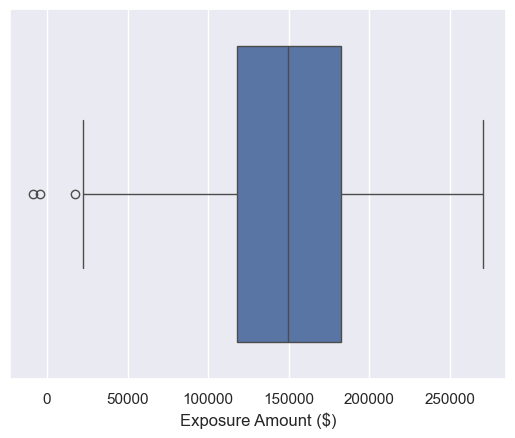

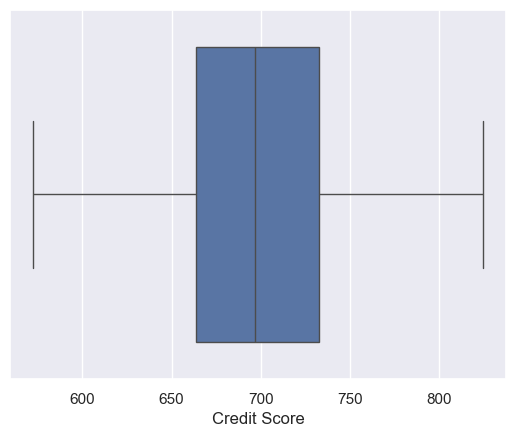

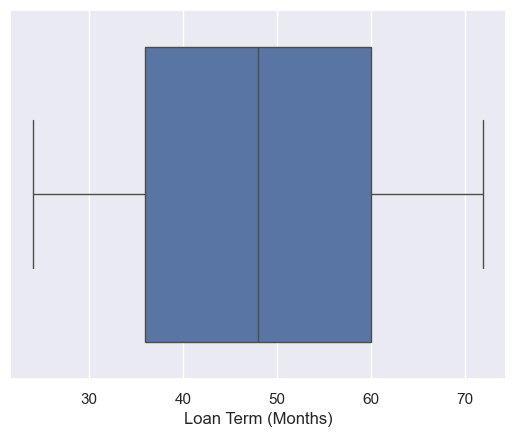

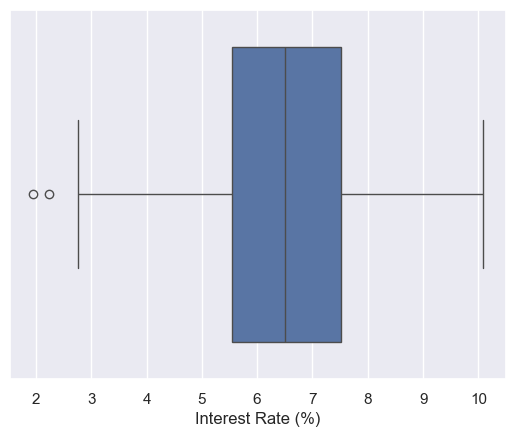

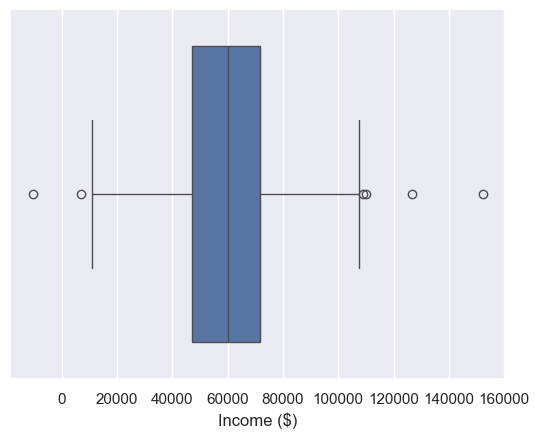

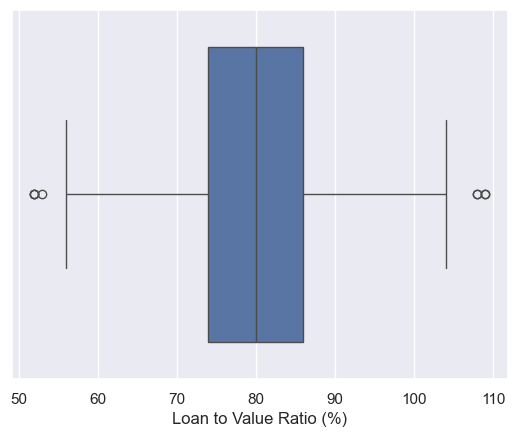

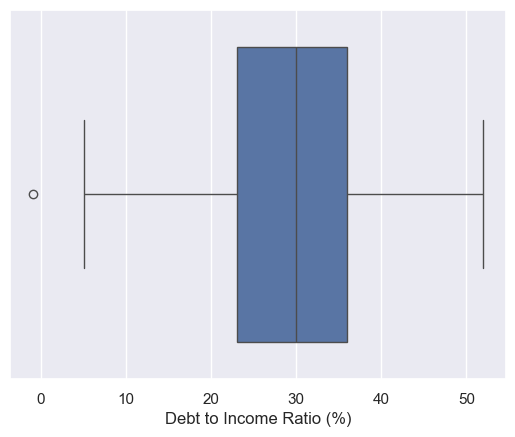

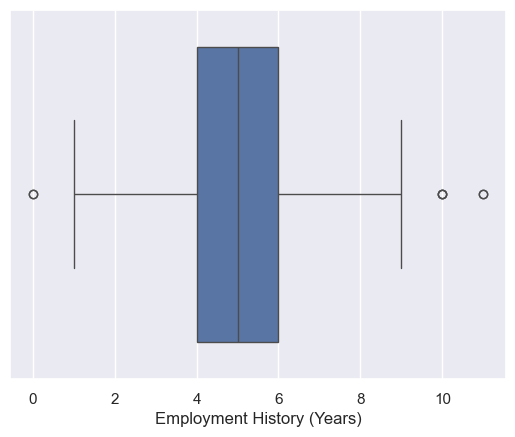

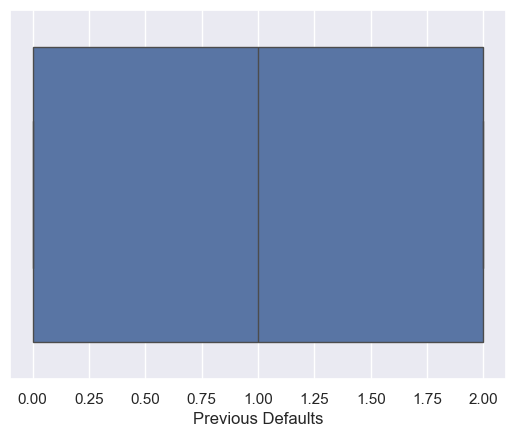

In [72]:
for i in df_deploy.columns:
    if df_deploy[i].dtypes == int  or df_deploy[i].dtypes == float:
        sns.boxplot(data=df_deploy,x=df_deploy[i])
        plt.show()

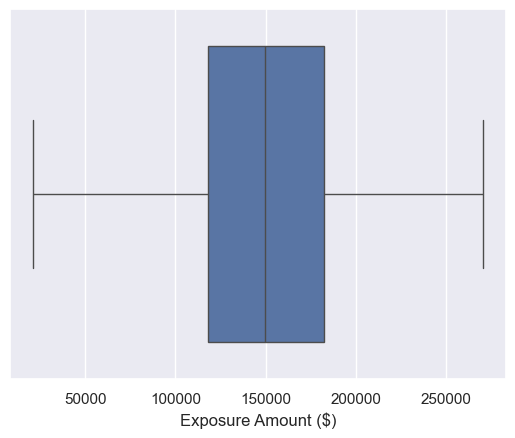

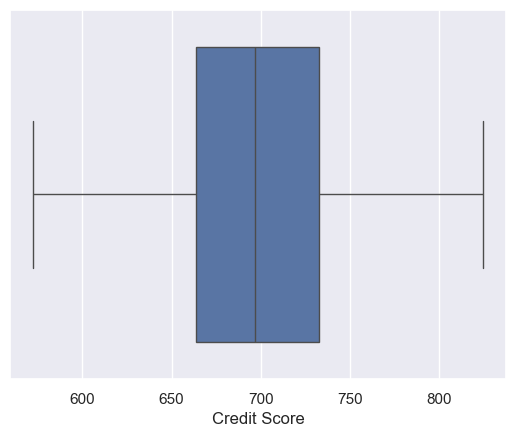

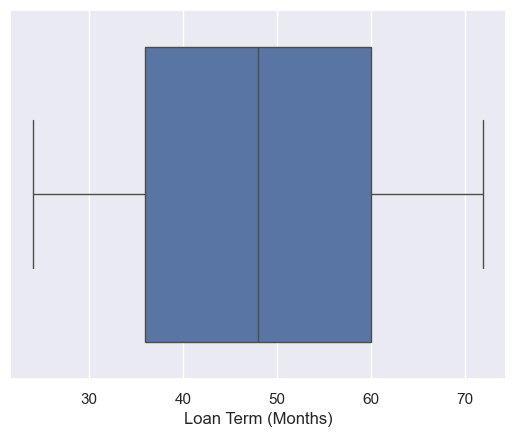

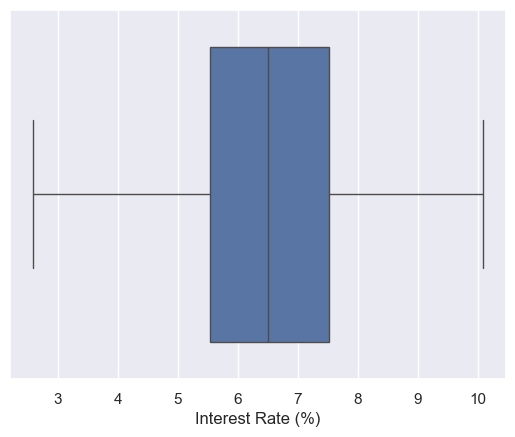

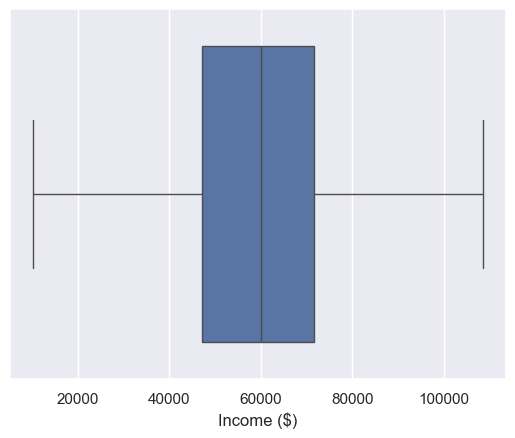

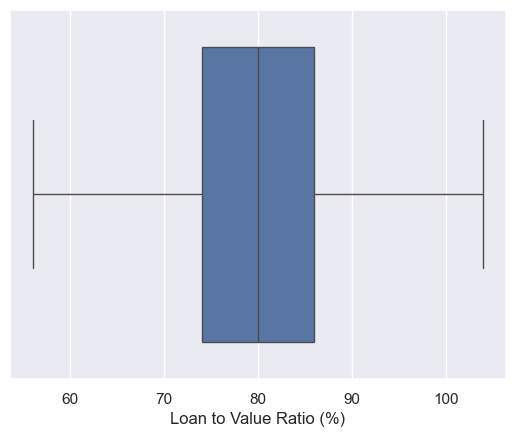

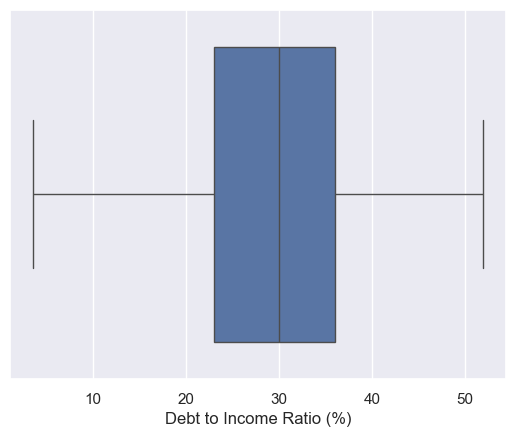

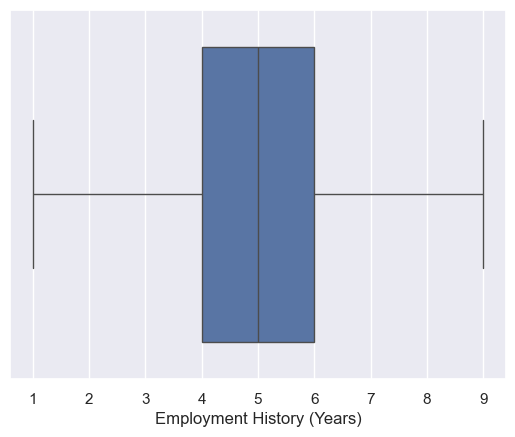

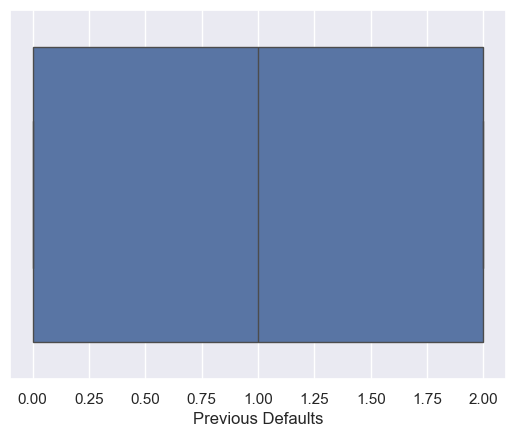

In [75]:
q1 = df_deploy.quantile(0.25, numeric_only = True)
q3 = df_deploy.quantile(0.75, numeric_only = True)
iqr = q3-q1
Upper = q3 + 1.5*iqr
Lower = q1 - 1.5*iqr

for i in df_deploy.columns:
    if df_deploy[i].dtypes in [int, float]:
        df_deploy[i] = np.where(df_deploy[i]>Upper[i], Upper[i], df_deploy[i])
        df_deploy[i] = np.where(df_deploy[i]<Lower[i], Lower[i], df_deploy[i])
        sns.boxplot(data=df_deploy, x=df_deploy[i])
        plt.show()

In [92]:
df_deploy = df_deploy[['Income ($)', 'Loan Term (Months)','Debt to Income Ratio (%)', 'Previous Defaults', 'Employment History (Years)']]

In [93]:
df_deploy['LGD predicted'] = reg.predict(df_deploy)

df_deploy

,Income ($),Loan Term (Months),Debt to Income Ratio (%),Previous Defaults,Employment History (Years),LGD predicted
0,57712.0,36.0,23.0,1.0,6.0,8134.891046
1,37490.0,36.0,41.0,0.0,7.0,5289.035719
2,35857.0,72.0,46.0,1.0,7.0,5063.803217
3,37531.0,72.0,20.0,2.0,4.0,5296.569997
4,84892.0,36.0,28.0,0.0,2.0,11962.854209
...,...,...,...,...,...,...
395,66358.0,24.0,23.0,1.0,4.0,9351.016197
396,71919.0,36.0,38.0,1.0,5.0,10137.256574
397,28667.0,72.0,42.0,0.0,4.0,4050.547109
398,55885.0,24.0,38.0,0.0,5.0,7877.762303
